In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data_dir = "../../data_dir"

In [3]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
df = geneinfo.load_gene_file("../../csv")

In [5]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

This may take a minute or two...
'ge' dictionary successfully loaded


In [16]:
term = 'reward'
tsaba.is_term(term)

True

In [17]:
%%time
tsaba.estimate_ns_act(term, rnn_args={"radius":3})

CPU times: user 1.82 s, sys: 204 ms, total: 2.02 s
Wall time: 2.04 s


In [64]:
reload(analysis)

<module 'nsaba.nsaba.analysis' from '/Users/simonhaxby/Code/Python/nsaba/nsaba/analysis.py'>

In [65]:
analy = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


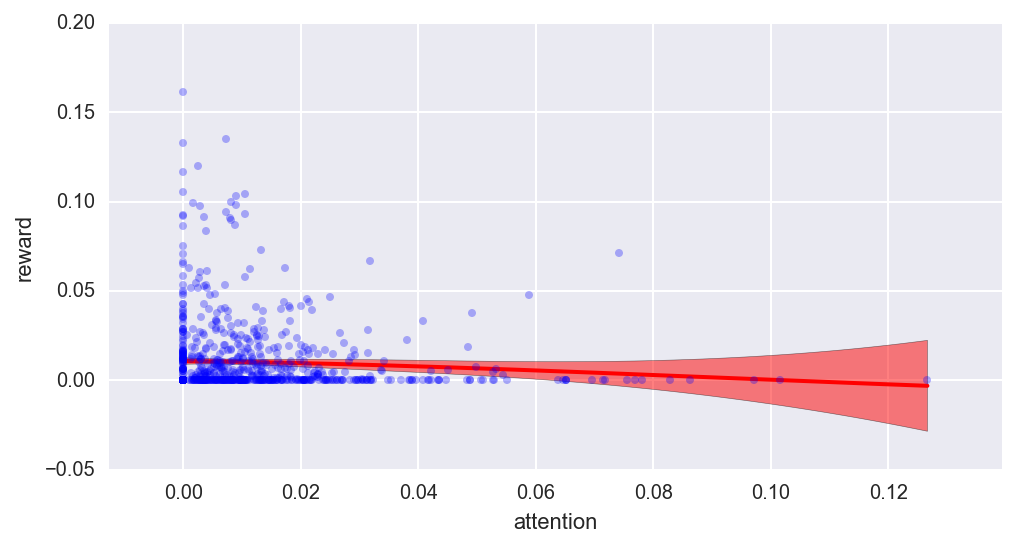

In [62]:
plt.figure(figsize=(8,4))
analy.gp_ns_ns('attention', 'reward', theta0=1, thetaU=1, thetaL=1e-3);

In [ ]:
plt.figure(figsize=(8,4))
analy.gp_ns_ge('attention', 1813, theta0=1, thetaU=1, thetaL=1e-3);

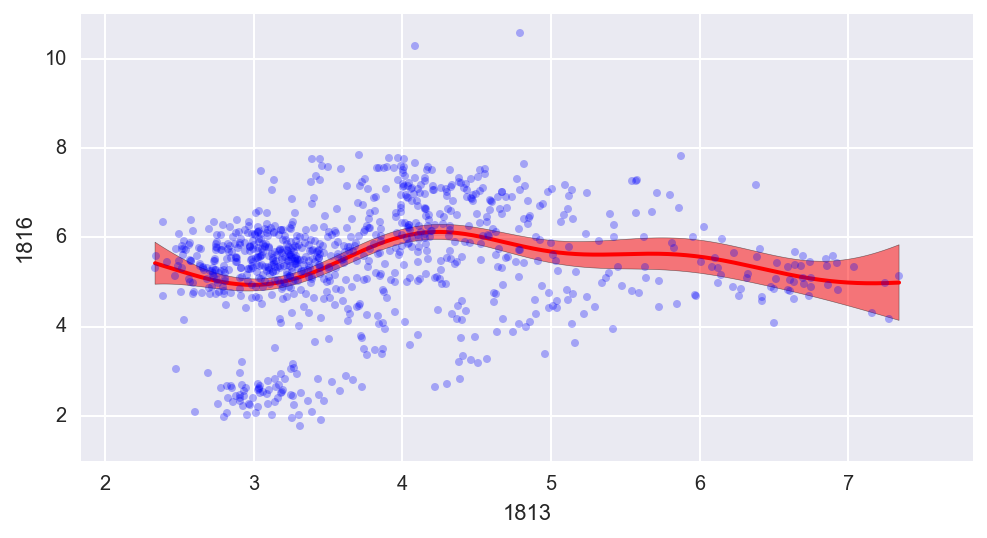

In [66]:
plt.figure(figsize=(8,4))
analy.gp_ge_ge(1813, 1816, theta0=1, thetaU=1, thetaL=1e-3);

In [ ]:
analy.term_ge_ttest(term, 1813, split_method='quant', graphops='box')

In [ ]:
analy.term_ge_ttest?

In [ ]:
ttest_metr = analy.term_ge_ttest_multi(term, split_method='quant')

In [ ]:
analy.term_ge_ttest_multi?

In [ ]:
fetch = False
if fetch:
    eids = geneinfo.fetch_entrez_ids("reward", 5)
    eids = [int(eid) for eid in eids]

In [ ]:
analy.gene_cohen_d_distr(ttest_metr)

In [ ]:
analy.p_val_distr(ttest_metr)

In [ ]:
analy.fetch_gene_descriptions(ttest_metr, csv_path="../../csv", nih_fetch_num=10)

In [ ]:
r_vals = analy.term_ge_spearman_rho(term)

In [ ]:
analy.gene_rho_distr(r_vals)

In [ ]:
analy.fetch_gene_descriptions(r_vals, coeff='spearman', csv_path="../..")